In [18]:
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('data.csv')
df=df[df['type']=='INFECTED']
dfx=df['datetime']
dfy=df["new_cases"]
raw_y=dfy.to_numpy()
y=dfy
# for i in range(raw_y.shape[0]):
#     y.append(int(raw_y[i].split(' ')[0].replace(',','')))
y=np.array(y)
dfx=pd.to_datetime(dfx)
dfx=dfx.map(dt.datetime.toordinal)
x=dfx.to_numpy()
x=x[:,np.newaxis]


(3161, 3161, 1)
Accuracy 5.574445153657248% on test size


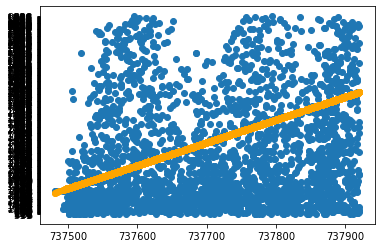

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
tau = .005
w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(x.shape[0])])
print(w.shape)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1000)
clf = LinearRegression()
clf.fit(x_train,y_train)

s=clf.score(x_test,y_test)
print("Accuracy {0}% on test size".format(s*100))
y_pred=clf.predict(x_train)

plt.scatter(x_train[:,[0]],y_train)
plt.scatter(x_train[:,[0]],y_pred,color="orange")

In [20]:
v1=dt.datetime.now().toordinal()
from datetime import timedelta  

v2=(dt.datetime.now() + timedelta(days=10)).toordinal()

v=np.array([v1,v2])
clf.predict(v[:,np.newaxis])

array([505.74619609, 515.24843531])